**K Means Handson**




1.   unsupervised machine learning
2.   clustering algorithm
3. It divides the data into group of k clusters using mean from centroid of clusters as basis.

4. ssd(sum of square distances)==inertia


*  ssd  tells how closely the clusters is bound and dispersed ,if there is one big cluster then ssd is large
*   List item







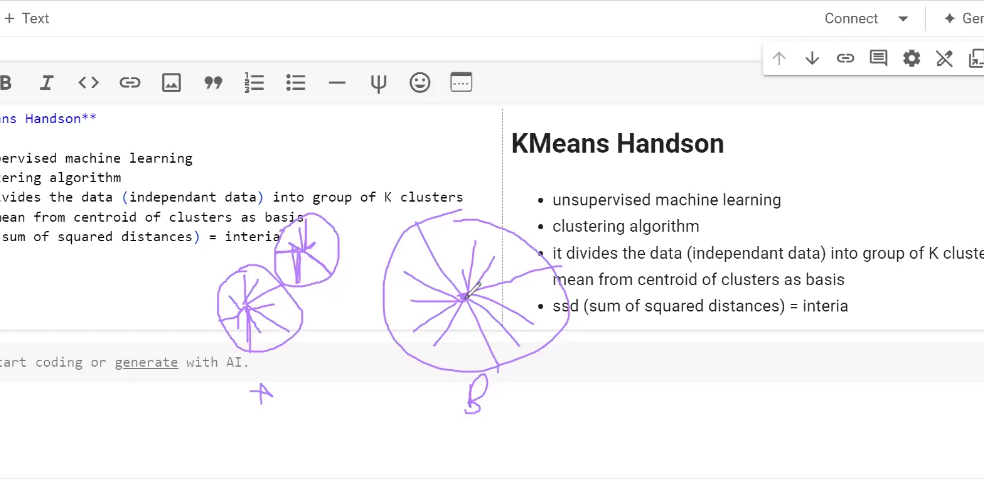

In [ ]:
#IN (B) SSD IS LARGE AS COMPARED TO A, we would go with A because it is having lesser inertia .

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Cricket.csv',encoding='latin1')

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


**Analysis of data**

In [ ]:
df.shape

(79, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


**Converting span to Exp **

In [ ]:
#span 2010 to Exp (2015-2010) :Exp

In [ ]:
#split the years into start and end

In [ ]:
df[['start','end']]=df.Span.str.split('-',expand=True)  # with the help of expand=True it will store both the values to start and end ,If I would not have used start and end then it will store only first value

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [ ]:
#creating Exp column

In [ ]:
df[['start','end']]=df[['start','end']].astype(int)
df['Exp']=df['end']-df['start']
df.head()


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [ ]:
#drop the columns

In [ ]:
df=df.drop(['Span','start','end'],axis=1)  #axis=1 is referring to columns

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


**Handle HS columns**

In [ ]:
df[['HS','extra']]=df.HS.str.split('*',expand=True)

In [ ]:
df[['HS']]=df[['HS']].astype(int)

In [ ]:
df.head(10)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,extra
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,None
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,None
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,None
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,None
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,None
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,None
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,None
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,None


In [ ]:
df=df.drop(['extra'],axis=1)

In [ ]:
#we can use replace when the entire symbol is * but in this case there is not the entire symbol

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [ ]:
# we would get all columns of integer type, only the Player colum is object

**Handling missing values and duplicates**

In [ ]:
df.isna().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


In [ ]:
df.duplicated().sum()

0



*  Who is the top player wrt Ave




In [ ]:
av_sorted=df.sort_values(by='Ave',ascending=False)

In [ ]:
av_sorted=av_sorted[:10]
av_sorted

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9
64,MEK Hussey (AUS),185,157,44,5442,109,48.15,6243,87.16,3,39,3,8
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
51,DM Jones (AUS),164,161,25,6068,145,44.61,8362,72.56,7,46,6,10


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78],
 [Text(0, 0, 'SR Tendulkar\xa0(INDIA)'),
  Text(1, 0, 'KC Sangakkara\xa0(Asia/ICC/SL)'),
  Text(2, 0, 'RT Ponting\xa0(AUS/ICC)'),
  Text(3, 0, 'ST Jayasuriya\xa0(Asia/SL)'),
  Text(4, 0, 'DPMD Jayawardene\xa0(Asia/SL)'),
  Text(5, 0, 'Inzamam-ul-Haq\xa0(Asia/PAK)'),
  Text(6, 0, 'JH Kallis\xa0(Afr/ICC/SA)'),
  Text(7, 0, 'SC Ganguly\xa0(Asia/INDIA)'),
  Text(8, 0, 'R Dravid\xa0(Asia/ICC/INDIA)'),
  Text(9, 0, 'BC Lara\xa0(ICC/WI)'),
  Text(10, 0, 'TM Dilshan\xa0(SL)'),
  Text(11, 0, 'Mohammad Yousuf\xa0(Asia/PAK)'),
  Text(12, 0,

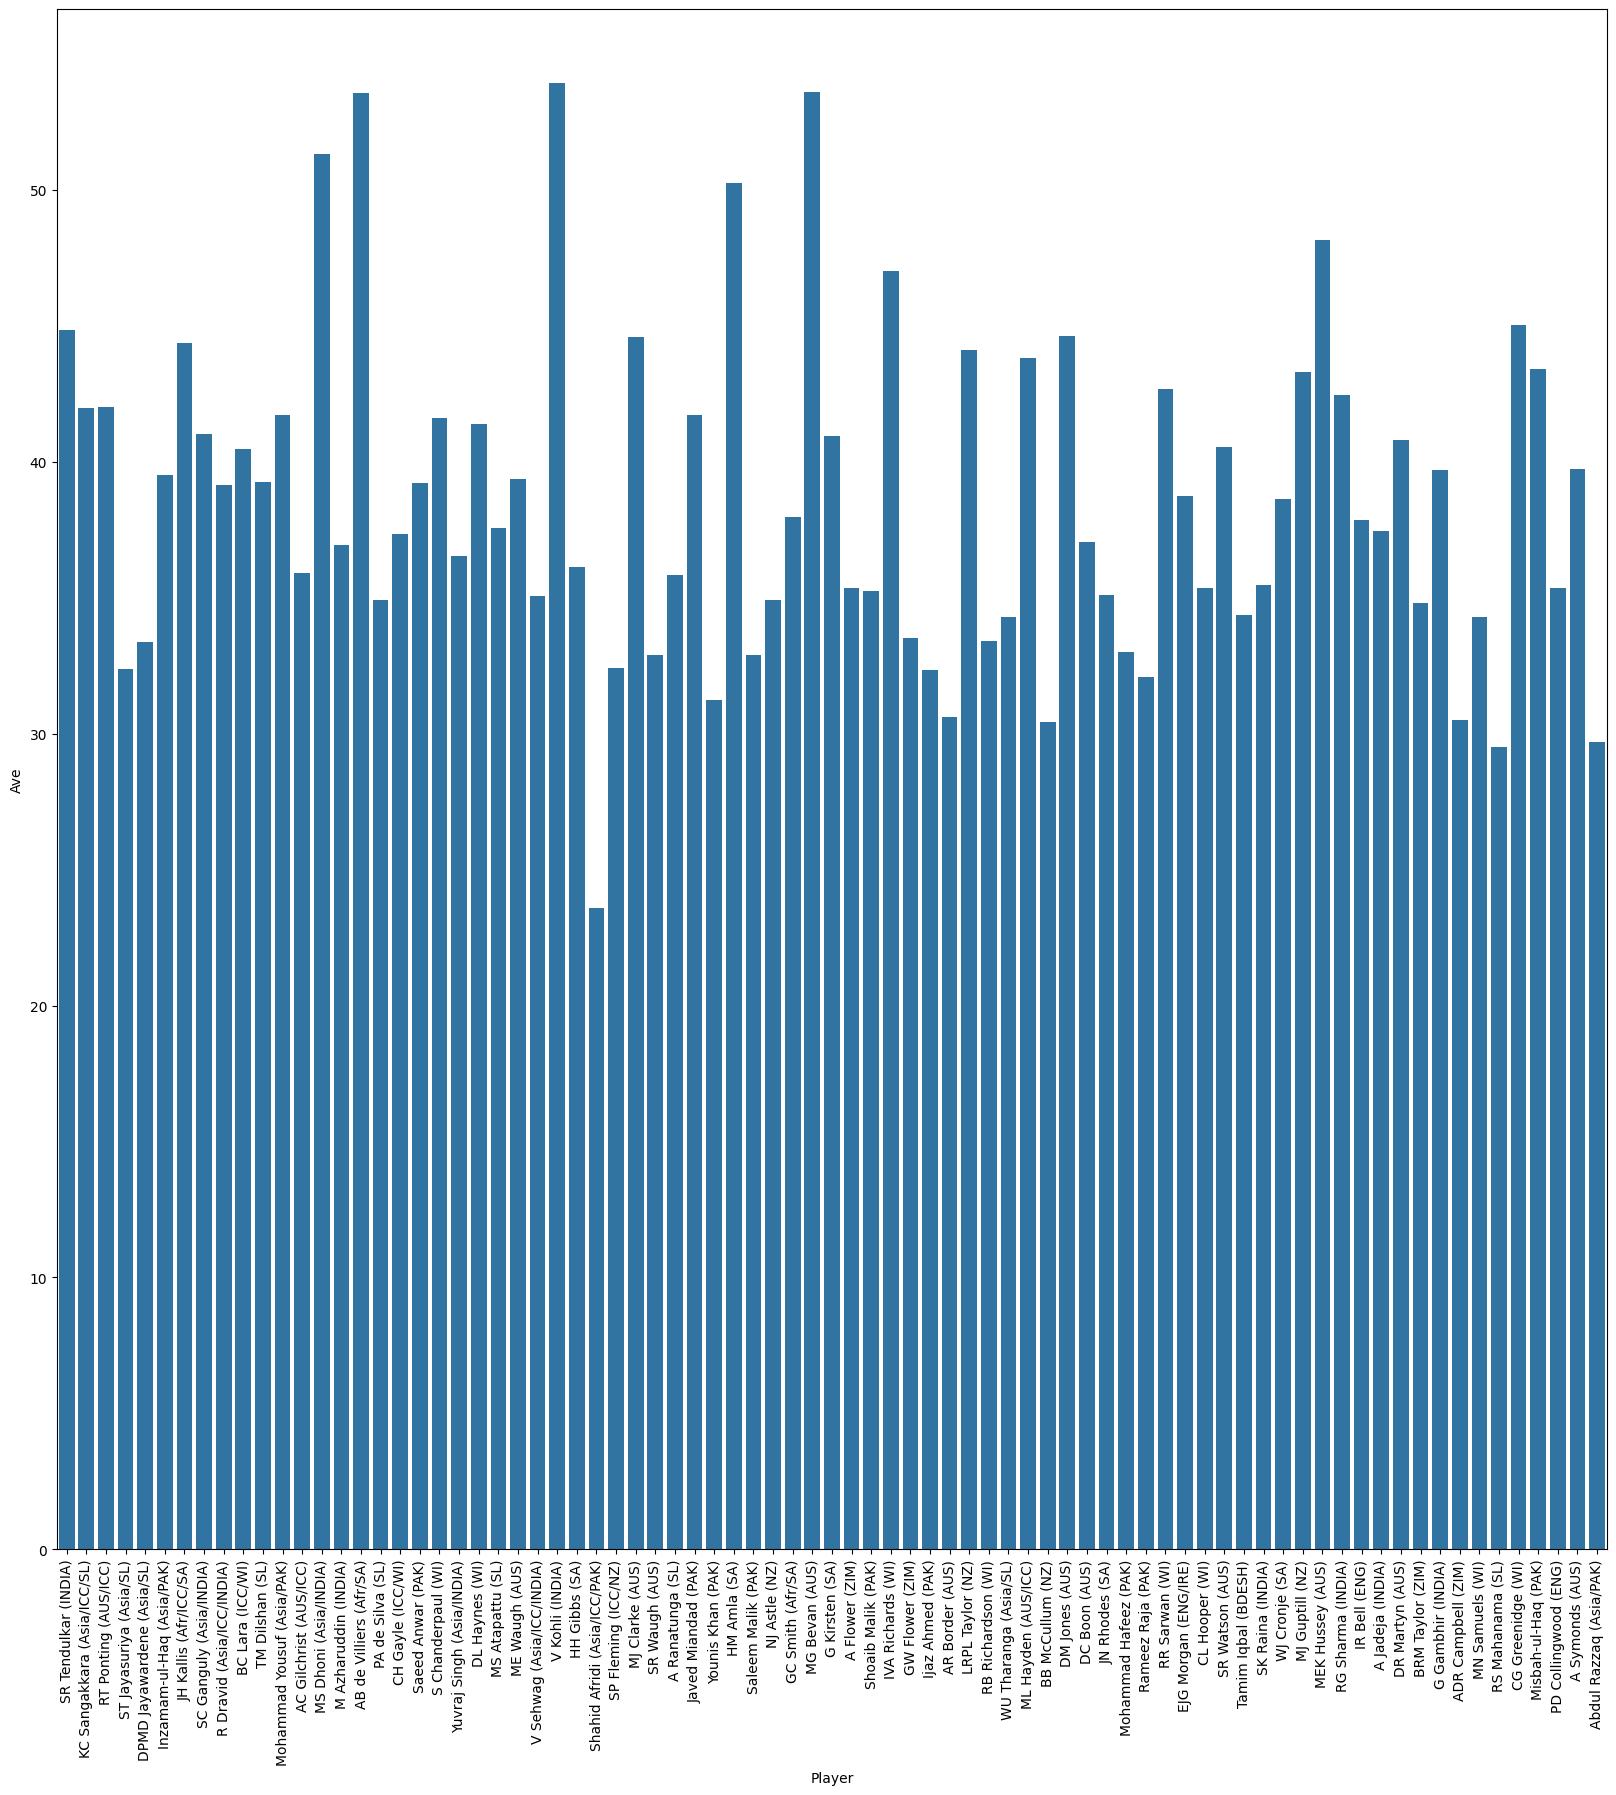

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['Player'],y=df['Ave'])
plt.xticks(rotation=90)

**CLustering**

In [ ]:
#Preparing data for clustering

In [ ]:
df=df.drop(['Player'],axis=1)

In [ ]:
#standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
df_scaled=sc.fit_transform(df)

In [ ]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
cols=df.columns

In [ ]:
cols

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'Exp'],
      dtype='object')

In [ ]:
df_scaled=pd.DataFrame(df_scaled,columns=cols)

In [ ]:
#stadrdisation brings out the dataset in the range where mean is 0 and standard deviation as 1


In [ ]:
#we have to bring it to a scale which is nearly equal to every column

In [ ]:
#ach and every list,nest list will be converted into first row

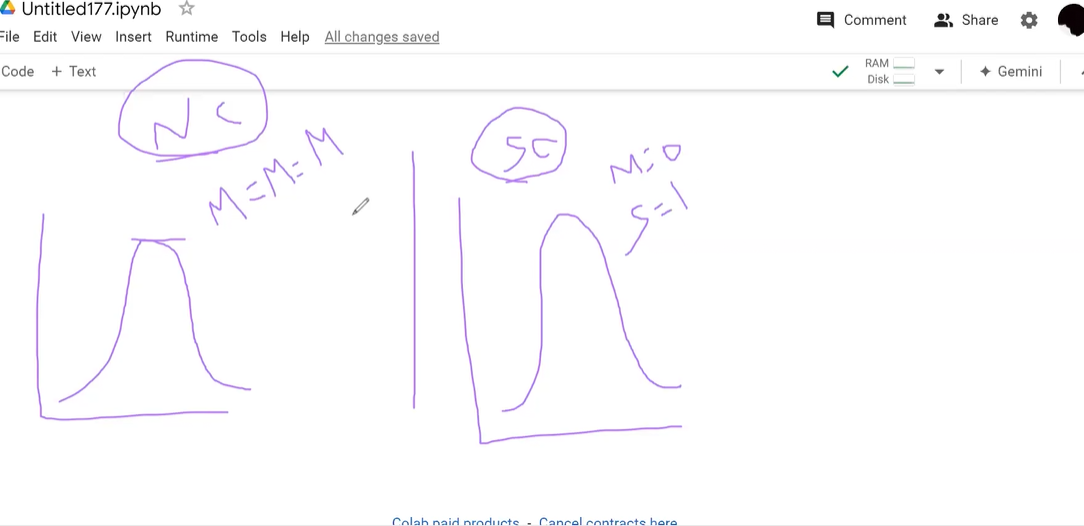

In [ ]:
#we mention what is minimum value and maximum value

In [ ]:
#in normalisation we bring the particular range between 0 and 1

In [ ]:
#fit will only apply statistical properties  and it will not change the data.

In [ ]:
#transform will implement thwe change

In [ ]:
#fit_transform will do both of the above

**Optimal number for K**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans
clusters=list(range(2,8))
ssd=[]    #optimal range from clusters:2,8
for k in clusters: #running loop for k=2,3,4,5,6,7,8
  model_clusters=KMeans(n_clusters=k,max_iter=150,random_state=0)   #creating KMeans clusters for each model
     #so that there is not any discrepancy in the random value selected
  model_clusters.fit(df_scaled)       #fitting that model on my dataset
  ssd.append(model_clusters.inertia_)  #storing the inertia value for each k=2,3,4,5,6,7,8
                                        #inertia will tell which is the optimal value of K
print(ssd)

[644.8298268927057, 531.4535214769, 462.59719099146156, 423.3168214688501, 382.20335384815724, 337.07429493752664]


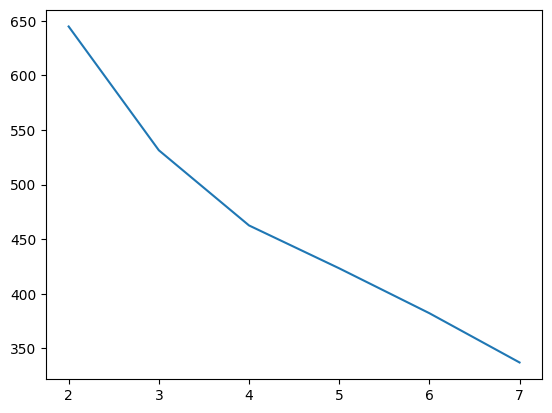

In [ ]:
plt.plot(clusters,ssd)

In [ ]:
from sklearn.cluster import KMeans
clusters=list(range(2,8))
ssd=[]
for k in clusters:
  km=KMeans(n_clusters=k,max_iter=150,random_state=0)
  km.fit(df_scaled)
  ssd.append(km.inertia_)


plt.plot(clusters,ssd)


In [ ]:
#we can choose 3 and 4 only we can take either because there is bent in both of them

In [ ]:
#from the above graph clearly there is bent at 3 and 4 out of 3 and 4 we can choose any k value to proceed further

Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
clusters=[3,4]
ssd=[]    #optimal range from clusters:2,8
for k in clusters: #running loop for k=2,3,4,5,6,7,8
  model_clusters=KMeans(n_clusters=k,max_iter=150,random_state=0)   #creating KMeans clusters for each model
     #so that there is not any discrepancy in the random value selected
  model_clusters.fit(df_scaled)       #fitting that model on my dataset
  ssd.append(model_clusters.inertia_)
  cluster_labels=model_clusters.labels_          # These are which datapoins in a row belongs to which clusters
  s_score=silhouette_score(df_scaled,cluster_labels)
  print(k,s_score)                                                     #making cluster labels

3 0.21336526403477102
4 0.2045952373293258


#From above s_score is maximum  for k=4 so we will be going ahead for k=4 as optimal value for clusters

In [ ]:
#applying clustering with k=4
model=KMeans(n_clusters=4,max_iter=150,random_state=0)
model.fit(df_scaled)


KMeans(max_iter=150, n_clusters=4, random_state=0)

In [ ]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 3, 0, 1, 0,
       0, 0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
df['cluster']=model.labels_
df.head(10)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
5,378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,2
6,328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,2
7,311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,2
8,344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,2
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0


In [ ]:
#there are 4 clusters and these 4 clusters contain entire data

In [ ]:
df.tail(10)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster
69,167,166,15,5258,145,34.82,7060,74.47,8,32,13,11,3
70,147,143,11,5238,150,39.68,6144,85.25,11,34,11,10,3
71,188,184,14,5185,131,30.50,7834,66.18,7,30,11,11,3
72,187,177,26,5180,133,34.30,6794,76.24,10,28,10,16,3
73,213,198,23,5162,119,29.49,8521,60.57,4,35,15,13,3
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,3
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,3
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,3
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,3
78,265,228,57,5080,112,29.70,6252,81.25,3,23,14,15,3


In [ ]:
df[df['cluster']==0]

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0
10,330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,0
11,288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,0
12,287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,0
13,295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,0
14,334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,0
16,308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,0
17,269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,0
18,247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,0
19,268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,0


In [ ]:
df[df['cluster']==0]

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0
10,330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,0
11,288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,0
12,287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,0
13,295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,0
14,334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,0
16,308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,0
17,269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,0
18,247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,0
19,268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,0


In [ ]:
df[df['cluster']==1]

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster
15,222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,1
24,251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,1
25,188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,1
34,156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,1
39,185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,1
42,187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,1
49,161,155,15,6133,181,43.80,7767,78.96,10,36,9,15,1
59,190,169,27,5757,185,40.54,6365,90.44,9,33,12,13,1
63,146,143,16,5500,237,43.30,6269,87.73,12,32,12,8,1
65,158,152,24,5435,264,42.46,6427,84.56,11,31,11,10,1


**Visualisation of Clusters**

In [ ]:
X=df_scaled.iloc[:,[3,6]].values  #Runs,BF
X

array([[ 4.26232808,  3.68121424],
       [ 2.60911662,  2.63538469],
       [ 2.40009894,  2.31965067],
       [ 2.29204075,  1.58829472],
       [ 1.98442984,  1.99635416],
       [ 1.62515607,  1.93081256],
       [ 1.5620564 ,  1.95381514],
       [ 1.47687184,  1.80603146],
       [ 1.28993905,  1.76443775],
       [ 1.09906254,  1.07183957],
       [ 1.05370965,  0.70852488],
       [ 0.82891706,  1.02646463],
       [ 0.78908539,  0.07485112],
       [ 0.74057751,  0.3218925 ],
       [ 0.6940415 ,  0.94044129],
       [ 0.6707735 , -0.12271897],
       [ 0.65697044,  0.55412401],
       [ 0.63212495,  0.36222579],
       [ 0.47555888,  0.39499659],
       [ 0.45741773,  0.85819919],
       [ 0.42705101,  0.07548132],
       [ 0.40614924,  1.26751904],
       [ 0.35921886,  0.9168085 ],
       [ 0.34778204,  0.43123353],
       [ 0.25825938, -0.55315078],
       [ 0.20817401, -0.23079958],
       [ 0.18766662,  0.01151525],
       [ 0.17583543, -0.87991343],
       [ 0.16518736,

In [ ]:
y_kmeans=model.fit_predict(X)  #predicting clusers for a part
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
#for visulaising I need lesser dataset becuase For large dataset it would be complex

<Axes: >

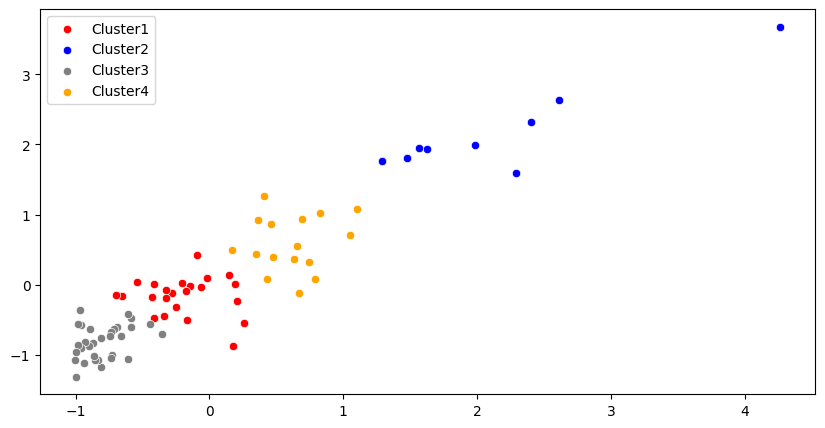

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X[y_kmeans==0,0],y=X[y_kmeans==0,1],label='Cluster1',color='red')      #1 is representing y axis and 0 is representing X -axis
sns.scatterplot(x=X[y_kmeans==1,0],y=X[y_kmeans==1,1],label='Cluster2',color='blue')        #other1,2,3,4 are the number of clusters
sns.scatterplot(x=X[y_kmeans==2,0],y=X[y_kmeans==2,1],label='Cluster3',color='grey')
sns.scatterplot(x=X[y_kmeans==3,0],y=X[y_kmeans==3,1],label='Cluster4',color='orange')

Recap:


1.   import dataset

2.   handled object column null values ,duplicates

1.  Visualisation
2.   preprocesing(Standard Scaler)
3.opimal value of K (1st-> inertia->elbow method-> but in inertia there was no clear bend at one K value->silhouette score-> and that give us the best K value

1.   Using the model find the labels Unlabelled data is converted to labelled data using model.labels_ using clustering having 4 classes in target
2.   (optional)

1.   Took out 2 columns for better visualisation
2.   Predicted labels for that data


1.   Visualised the same
2.   









